In [13]:
#Create a synthetic dataset of 5000 users with demographic features and engagement metrics, following realistic distributions and relationships.
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define number of users
num_users = 5000

# Generate Gender (binary distribution ~50/50 male/female)
genders = ['Male', 'Female']
gender = np.random.choice(genders, size=num_users, p=[0.5, 0.5])

# Generate Age (approximately normal distribution, mean ~35, std ~10, clipped to 18-60)
age = np.random.normal(loc=35, scale=10, size=num_users)
age = np.clip(age, 18, 60)               # limit ages between 18 and 60
age = np.round(age).astype(int)         # convert to integer age

# Generate Location (categorical regions with predefined probabilities)
locations = ['North America', 'Europe', 'Asia', 'South America', 'Australia', 'Africa']
loc_probs = [0.3, 0.2, 0.2, 0.1, 0.1, 0.1]  # probabilities must sum to 1
location = np.random.choice(locations, size=num_users, p=loc_probs)

# Generate Activity Level (categorical: Sedentary, Lightly Active, Moderately Active, Highly Active)
activity_levels = ['Sedentary', 'Lightly Active', 'Moderately Active', 'Highly Active']
act_probs = [0.25, 0.35, 0.30, 0.10]  # more users are in lower activity categories
activity = np.random.choice(activity_levels, size=num_users, p=act_probs)

# Initialize arrays for engagement metrics
app_sessions = np.zeros(num_users)
distance = np.zeros(num_users)
calories_burned = np.zeros(num_users)

# Generate App Sessions, Distance Traveled, and Calories Burned based on Activity Level
for i, level in enumerate(activity):
    if level == 'Sedentary':
        # Sedentary: very low app usage and distance
        app_sessions[i] = np.random.normal(loc=5, scale=3)          # few app sessions
        dist = np.random.normal(loc=2, scale=2)                     # minimal distance (km)
    elif level == 'Lightly Active':
        app_sessions[i] = np.random.normal(loc=10, scale=5)         # low-moderate app sessions
        dist = np.random.normal(loc=10, scale=5)                    # some distance
    elif level == 'Moderately Active':
        app_sessions[i] = np.random.normal(loc=20, scale=8)         # moderate app sessions
        dist = np.random.normal(loc=30, scale=10)                   # moderate distance
    elif level == 'Highly Active':
        app_sessions[i] = np.random.normal(loc=40, scale=10)        # high app sessions
        dist = np.random.normal(loc=60, scale=15)                   # high distance

    # Ensure no negative values for sessions or distance
    if app_sessions[i] < 0:
        app_sessions[i] = 0
    if dist < 0:
        dist = 0
    distance[i] = dist

    # Generate Calories Burned, influenced by distance and gender (male tends to burn more per km)
    if gender[i] == 'Male':
        cal_factor = np.random.normal(loc=65, scale=5)   # males: ~65 calories per km on average
    else:
        cal_factor = np.random.normal(loc=55, scale=5)   # females: ~55 calories per km on average
    calories_burned[i] = dist * cal_factor

# Round the engagement metrics to appropriate types
app_sessions = np.round(app_sessions).astype(int)   # App sessions as integer count
distance = np.round(distance, 1)                   # Distance to one decimal place (float)
calories_burned = np.round(calories_burned).astype(int)  # Calories as integer

# Generate User Retention (binary: 1 for retained, 0 for churned)
# Assume retention likelihood is higher for more active users.
retained = np.zeros(num_users, dtype=int)
for i, level in enumerate(activity):
    # Base retention probability by activity level
    if level == 'Sedentary':
        p = 0.50  # 50% chance to retain
    elif level == 'Lightly Active':
        p = 0.70  # 70% chance
    elif level == 'Moderately Active':
        p = 0.85  # 85% chance
    elif level == 'Highly Active':
        p = 0.95  # 95% chance

    # Incorporate a slight age effect: older users (50+) slightly less likely to retain
    if age[i] >= 50:
        p *= 0.8   # reduce retention probability by 20% for older users
    elif age[i] <= 25:
        p *= 0.9   # slightly reduce for very young users (assuming they churn more often)

    # Determine retention outcome
    retained[i] = 1 if np.random.rand() < p else 0

# Create a pandas DataFrame with all generated columns
df = pd.DataFrame({
    'Gender': gender,
    'Age': age,
    'Location': location,
    'ActivityLevel': activity,
    'AppSessions': app_sessions,
    'Distance': distance,
    'CaloriesBurned': calories_burned,
    'Retained': retained
})

# Introduce some missing values in the dataset for demonstration (e.g., ~2% of ages missing)
missing_mask = np.random.rand(num_users) < 0.02
df.loc[missing_mask, 'Age'] = np.nan

# Preview the first few rows of the generated dataset
print(df.head())
print(f"\nDataset shape: {df.shape}")


   Gender   Age       Location      ActivityLevel  AppSessions  Distance  \
0    Male  29.0  North America      Highly Active           43      58.5   
1  Female  18.0  North America  Moderately Active           35      39.1   
2  Female  31.0         Africa      Highly Active           26      52.5   
3  Female  44.0         Europe          Sedentary            1       6.3   
4    Male  40.0         Europe          Sedentary            5       0.7   

   CaloriesBurned  Retained  
0            3891         1  
1            2157         1  
2            3074         1  
3             346         0  
4              45         0  

Dataset shape: (5000, 8)


In [14]:
#Exploratory Data Analysis (EDA)
# Examine the dataset for basic statistics, data quality issues, and distribution of variables. Visualize relationships and patterns in the data.
# Display summary information about the DataFrame
print("Basic Info:")
print(df.info())  # shows non-null counts and data types

# Compute summary statistics for numeric columns
print("\nSummary Statistics (Numeric):")
print(df.describe())  # count, mean, std, min, 25%, 50%, 75%, max for numeric columns

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values: for this dataset, fill missing Age with the median age
if df['Age'].isnull().any():
    median_age = df['Age'].median()
    df['Age'].fillna(median_age, inplace=True)
    print(f"\nFilled missing Age values with median age = {median_age:.1f}")

# Verify that no missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Age             4885 non-null   float64
 2   Location        5000 non-null   object 
 3   ActivityLevel   5000 non-null   object 
 4   AppSessions     5000 non-null   int64  
 5   Distance        5000 non-null   float64
 6   CaloriesBurned  5000 non-null   int64  
 7   Retained        5000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 312.6+ KB
None

Summary Statistics (Numeric):
               Age  AppSessions     Distance  CaloriesBurned     Retained
count  4885.000000   5000.00000  5000.000000     5000.000000  5000.000000
mean     34.996315     15.13200    19.552800     1174.671200     0.707400
std       9.676651     11.99724    19.283781     1174.434866     0.455002
min      18.000000      0.00000     

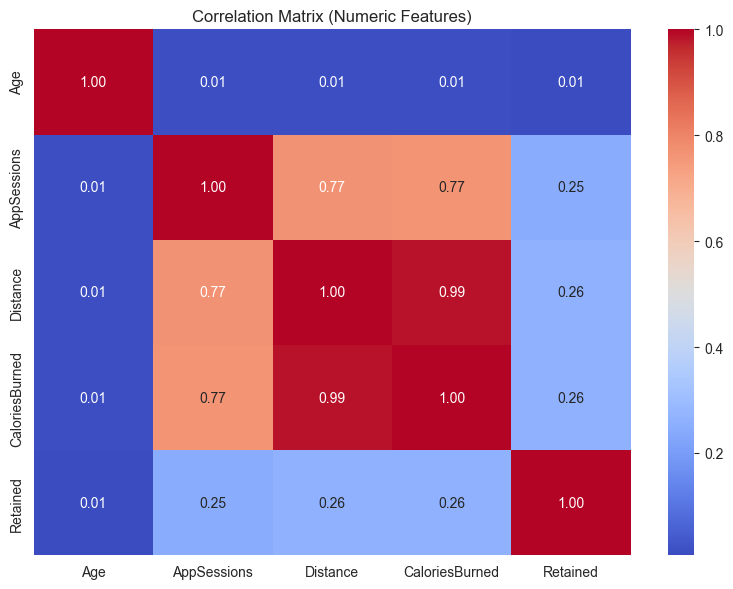

Saved correlation matrix heatmap as 'correlation_matrix.png'


In [15]:
#Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numeric features
numeric_features = df.select_dtypes(include='number').columns  # numeric column names
corr_matrix = df[numeric_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.show()
print("Saved correlation matrix heatmap as 'correlation_matrix.png'")
#We calculate the Pearson correlation matrix for numeric variables (Age, AppSessions, Distance, CaloriesBurned, Retained). The heatmap visualization helps identify relationships:
#We expect Distance and CaloriesBurned to be very highly correlated (since calories are derived from distance).
#AppSessions should also correlate positively with Distance and Calories.
#Retained (retention) likely shows positive correlation with usage metrics (AppSessions, Distance, Calories) because active users are more likely to be retained.
#We don't expect Age to be strongly correlated with these metrics (unless the retention probabilities by age introduced a slight effect).
#The heatmap (saved as correlation_matrix.png) highlights these correlations with colors and annotated values.


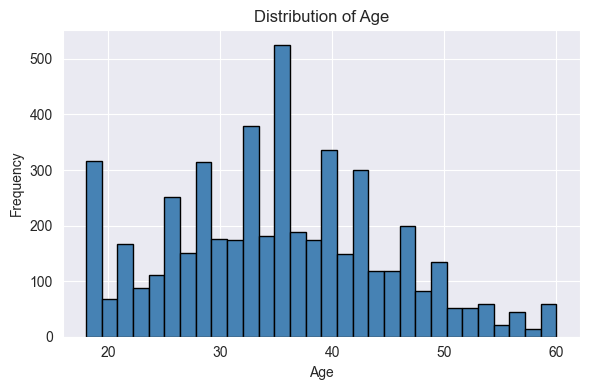

Saved histogram as 'age_distribution.png'


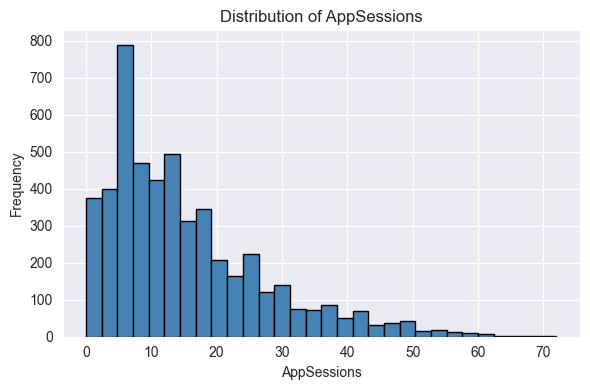

Saved histogram as 'appsessions_distribution.png'


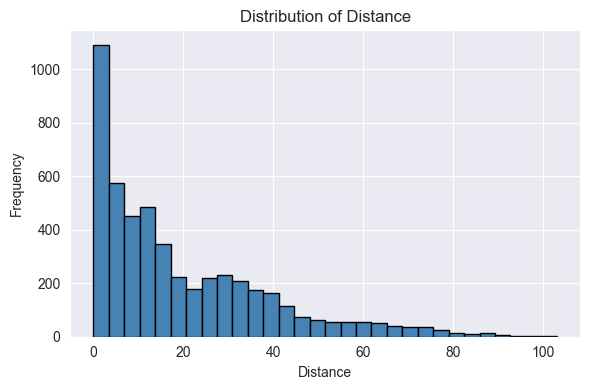

Saved histogram as 'distance_distribution.png'


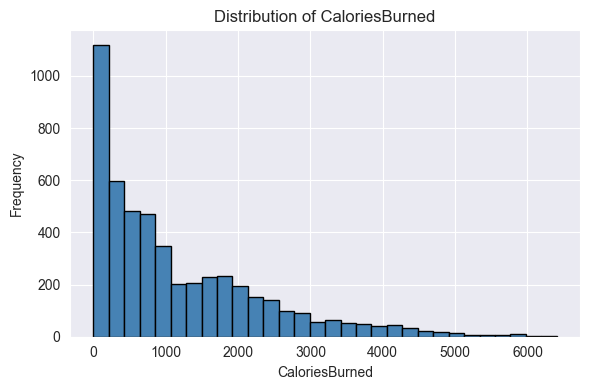

Saved histogram as 'caloriesburned_distribution.png'


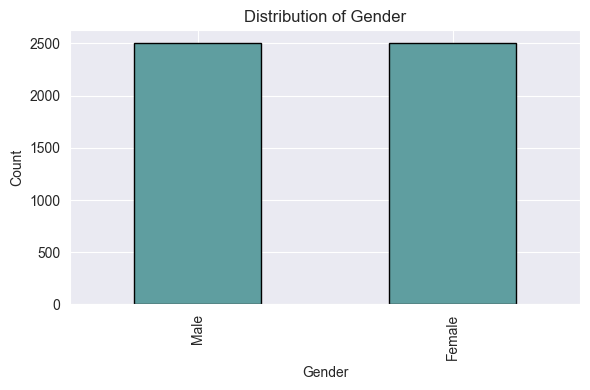

Saved bar chart as 'gender_distribution.png'


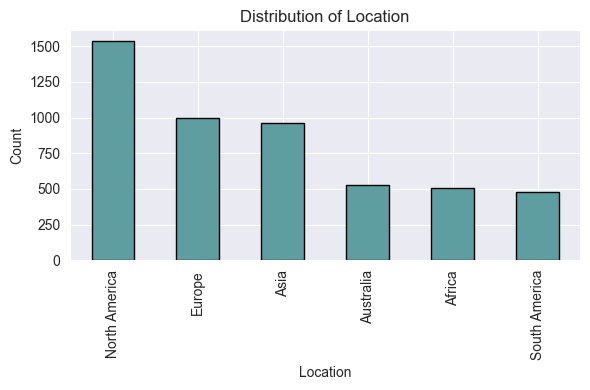

Saved bar chart as 'location_distribution.png'


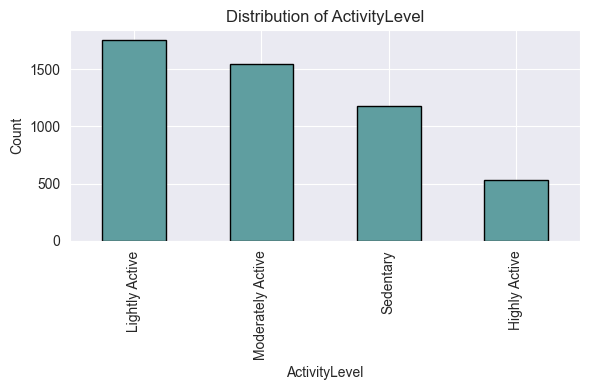

Saved bar chart as 'activitylevel_distribution.png'


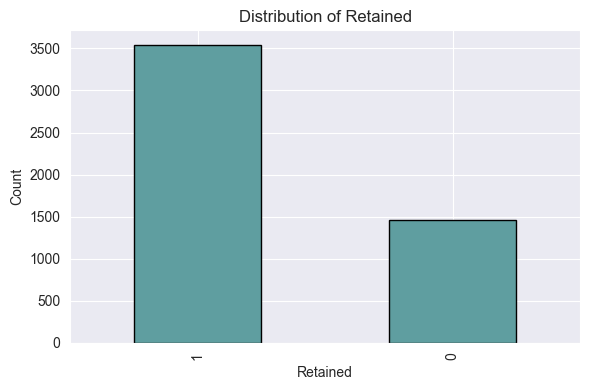

Saved bar chart as 'retained_distribution.png'


In [16]:
#Distribution of Variables
# Distribution of continuous variables: histograms for Age, AppSessions, Distance, CaloriesBurned
continuous_vars = ['Age', 'AppSessions', 'Distance', 'CaloriesBurned']
for var in continuous_vars:
    plt.figure(figsize=(6,4))
    df[var].hist(bins=30, color='steelblue', edgecolor='black')
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"{var.lower()}_distribution.png")
    plt.show()
    print(f"Saved histogram as '{var.lower()}_distribution.png'")

# Distribution of categorical variables: bar plots for Gender, Location, ActivityLevel, Retained
categorical_vars = ['Gender', 'Location', 'ActivityLevel', 'Retained']
for var in categorical_vars:
    plt.figure(figsize=(6,4))
    df[var].value_counts().plot(kind='bar', color='cadetblue', edgecolor='black')
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"{var.lower()}_distribution.png")
    plt.show()
    print(f"Saved bar chart as '{var.lower()}_distribution.png'")

# We plot histograms for the continuous variables:
# Age: Expect a roughly normal distribution centered around mid-30s (clipped at 18 and 60).
# AppSessions: Distribution reflecting more users with lower sessions (sedentary/lightly active groups) and a long tail for very active users.
# Distance and CaloriesBurned: Likely right-skewed distributions; most users cover lower distances/calories with a tail for highly active users.
#For categorical variables, we create bar charts:
#Gender: Approximately equal counts for Male and Female.
#Location: Distribution according to our specified probabilities (North America ~30%, Europe ~20%, etc.).
#ActivityLevel: More users in Sedentary/Lightly Active, fewer in Highly Active.
#Retained: Shows how many users were labeled retained vs churned (we expect a higher retained count due to our probabilities).
#Each plot is saved as a PNG file (e.g., age_distribution.png, gender_distribution.png, etc.) for later use.



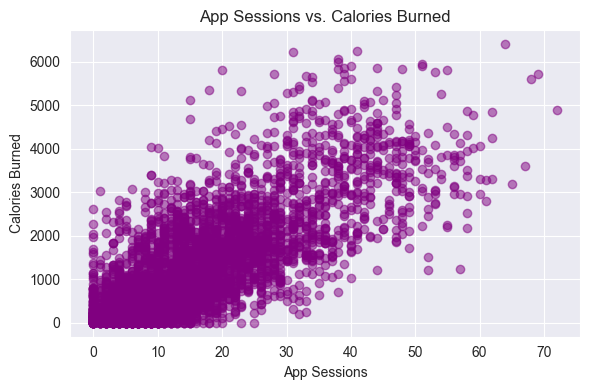

Saved scatter plot as 'sessions_vs_calories.png'


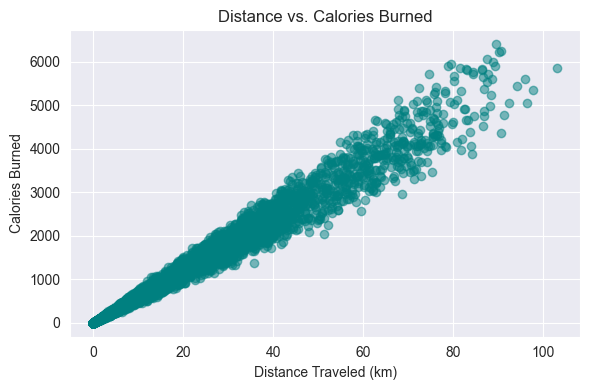

Saved scatter plot as 'distance_vs_calories.png'


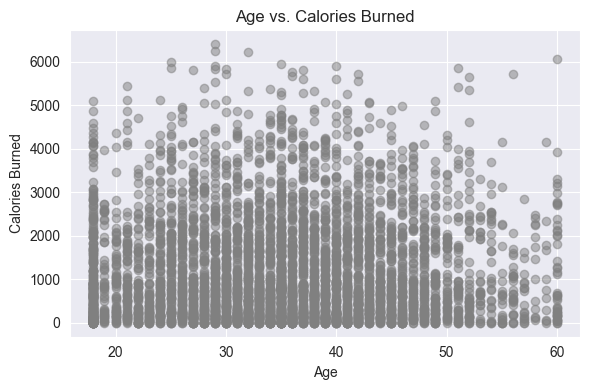

Saved scatter plot as 'age_vs_calories.png'


In [17]:
#Scatter Plots (Relationships Between Variables)
# Scatter plot: AppSessions vs CaloriesBurned
plt.figure(figsize=(6,4))
plt.scatter(df['AppSessions'], df['CaloriesBurned'], alpha=0.5, color='purple')
plt.title("App Sessions vs. Calories Burned")
plt.xlabel("App Sessions")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.savefig("sessions_vs_calories.png")
plt.show()
print("Saved scatter plot as 'sessions_vs_calories.png'")

# Scatter plot: Distance vs CaloriesBurned
plt.figure(figsize=(6,4))
plt.scatter(df['Distance'], df['CaloriesBurned'], alpha=0.5, color='teal')
plt.title("Distance vs. Calories Burned")
plt.xlabel("Distance Traveled (km)")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.savefig("distance_vs_calories.png")
plt.show()
print("Saved scatter plot as 'distance_vs_calories.png'")

# Scatter plot: Age vs CaloriesBurned
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['CaloriesBurned'], alpha=0.5, color='grey')
plt.title("Age vs. Calories Burned")
plt.xlabel("Age")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.savefig("age_vs_calories.png")
plt.show()
print("Saved scatter plot as 'age_vs_calories.png'")

#We create scatter plots to examine pairwise relationships:
#App Sessions vs Calories Burned: We expect a positive trend (users with more app sessions tend to burn more calories), though with some variance.
#Distance vs Calories Burned: This should show a strong positive correlation (approximately linear), since calories are calculated from distance.
#Age vs Calories Burned: Likely a weak or no clear trend, as we did not strongly link age to activity in the data generation. If anything, extremely older or younger users might show slightly lower calories due to retention differences, but the effect should be subtle.
#These scatter plots help identify outliers and the strength/form of relationships. All plots are saved as PNG files for reference.

In [18]:
# Regression Analysis
# Build a multiple linear regression model to predict CaloriesBurned from various features (Age, Gender, App Sessions, Activity Level, Location). Evaluate the model fit using R-squared and interpret the coefficients. Also, visualize how well the model predicts calories burned.

from sklearn.linear_model import LinearRegression

# Prepare feature matrix X and target vector y for regression
# Features: Age, Gender, AppSessions, ActivityLevel, Location (we will use one-hot encoding for categorical variables)
X = df[['Age', 'Gender', 'AppSessions', 'ActivityLevel', 'Location']].copy()

# One-hot encode categorical features: Gender, ActivityLevel, Location
X = pd.get_dummies(X, columns=['Gender', 'ActivityLevel', 'Location'], drop_first=True)
# Note: drop_first=True avoids dummy variable trap by dropping one category from each to serve as baseline.

# Target variable
y = df['CaloriesBurned']

# Initialize and fit the linear regression model
linreg = LinearRegression()
linreg.fit(X, y)

# Model coefficients and intercept
coef_dict = {col: coef for col, coef in zip(X.columns, linreg.coef_)}
intercept = linreg.intercept_

# Evaluate model performance (R-squared on the training data)
r_squared = linreg.score(X, y)

print("Linear Regression Model Coefficients:")
for feature, coef in coef_dict.items():
    print(f"  {feature}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_squared:.3f}")


#We use multiple linear regression to model Calories Burned as a function of:
#Age (numeric),
#Gender (categorical, one-hot encoded as Gender_Male with female as baseline),
#AppSessions (numeric),
#ActivityLevel (categorical, one-hot encoded e.g. ActivityLevel_Lightly Active, Moderately Active, Highly Active, with Sedentary as baseline),
#Location (categorical, one-hot encoded with one region as baseline).
#After encoding, we fit a LinearRegression model. We then print out the coefficient for each feature and the intercept. The R-squared value indicates the proportion of variance in Calories Burned explained by the model. Interpreting coefficients (example insights):
#A positive coefficient for AppSessions would mean more app sessions are associated with higher calories burned (as expected).
#The coefficients for ActivityLevel_* dummies indicate how being in those categories (Lightly/Moderately/Highly Active) affects calories burned relative to the baseline (Sedentary), controlling for other factors.
#The coefficient for Gender_Male would show the difference in calories burned for males vs females (we expect a positive value since we gave males a higher calorie burn rate).
#Location coefficients would tell if users from certain regions tend to burn more/less calories (in our synthetic data, we did not add regional differences, so these may be small or near zero).

Linear Regression Model Coefficients:
  Age: -0.38
  AppSessions: 1.11
  Gender_Male: 188.65
  ActivityLevel_Lightly Active: -2976.46
  ActivityLevel_Moderately Active: -1796.03
  ActivityLevel_Sedentary: -3440.80
  Location_Asia: 8.80
  Location_Australia: 33.58
  Location_Europe: 18.07
  Location_North America: -5.94
  Location_South America: 10.56
Intercept: 3475.30
R-squared: 0.815


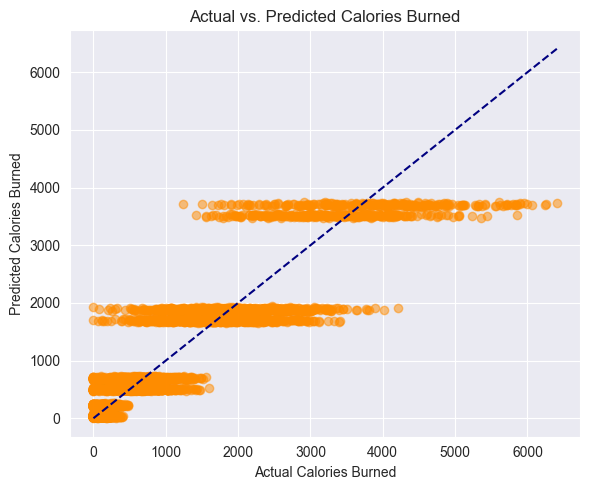

Saved plot as 'actual_vs_predicted_calories.png'


In [19]:
#Actual vs. Predicted Calories Burned
# Predict calories burned using the regression model
y_pred = linreg.predict(X)

# Scatter plot of Actual vs Predicted Calories Burned
plt.figure(figsize=(6,5))
plt.scatter(y, y_pred, alpha=0.5, color='darkorange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='navy', linestyle='--')  # 45-degree line for reference
plt.title("Actual vs. Predicted Calories Burned")
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.tight_layout()
plt.savefig("actual_vs_predicted_calories.png")
plt.show()
print("Saved plot as 'actual_vs_predicted_calories.png'")

# We generate predictions for Calories Burned using our model and plot them against the actual values:
#Each point represents a user. If the model were perfect, all points would fall on the diagonal line (Actual = Predicted).
#The 45-degree reference line helps visualize deviations: points above the line indicate the model under-predicted (actual > predicted), and points below the line indicate over-prediction.
#This plot (saved as actual_vs_predicted_calories.png) lets us assess the model fit:
#We expect a general upward trend (since the model captures some relationship), but there will be dispersion around the line due to unexplained variance.
#The R-squared printed earlier quantifies the fit (e.g., an R² close to 1 would mean a tight fit; a lower R² means substantial variance not explained by the model).


/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.

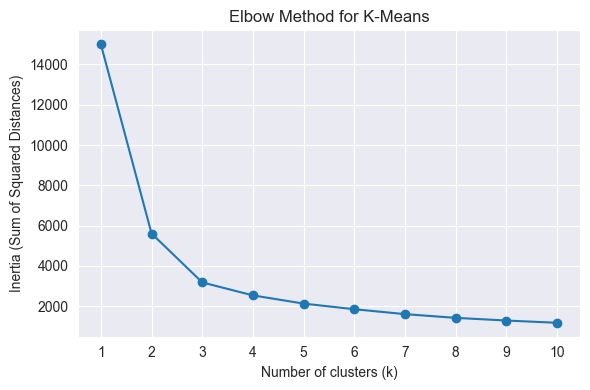

Saved elbow curve plot as 'elbow_curve.png'


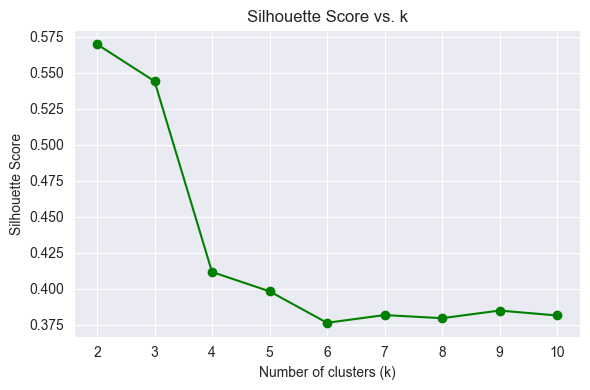

Saved silhouette score plot as 'silhouette_scores.png'


In [20]:
#Clustering Analysis
# Segment users into groups (clusters) based on their usage patterns (AppSessions, Distance, CaloriesBurned). We will apply K-Means clustering and determine the optimal number of clusters using the elbow method and silhouette score, then visualize the cluster assignments.
#Elbow Method and Silhouette Score for K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Features for clustering
clustering_features = ['AppSessions', 'Distance', 'CaloriesBurned']

# Standardize features (K-Means performs better when features are on similar scales)
scaler = StandardScaler()
X_clust = scaler.fit_transform(df[clustering_features])

# Use the elbow method to find optimal k (within-cluster sum of squares vs k)
inertias = []
sil_scores = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clust)
    inertias.append(kmeans.inertia_)
    if k > 1:
        # Compute silhouette score for k >= 2 (cannot be computed for k=1)
        score = silhouette_score(X_clust, kmeans.labels_, sample_size=1000, random_state=42)
        sil_scores.append(score)
    else:
        sil_scores.append(np.nan)

# Plot the elbow curve (k vs inertia)
plt.figure(figsize=(6,4))
plt.plot(list(K_range), inertias, marker='o')
plt.title("Elbow Method for K-Means")
plt.xticks(list(K_range))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.tight_layout()
plt.savefig("elbow_curve.png")
plt.show()
print("Saved elbow curve plot as 'elbow_curve.png'")

# Plot silhouette scores for k=2 to 10
plt.figure(figsize=(6,4))
plt.plot(list(K_range)[1:], sil_scores[1:], marker='o', color='green')
plt.title("Silhouette Score vs. k")
plt.xticks(list(K_range)[1:])
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.savefig("silhouette_scores.png")
plt.show()
print("Saved silhouette score plot as 'silhouette_scores.png'")

# Determine optimal k (for demonstration, let's choose k=3 based on elbow and silhouette trends)
optimal_k = 3

#Comments: We standardize the clustering features (AppSessions, Distance, CaloriesBurned) to ensure comparability. Then:
#Elbow Method: We run KMeans for k = 1 to 10 clusters and record the inertia (within-cluster sum of squares). The elbow point in the inertia plot suggests a good trade-off (adding more clusters beyond that yields diminishing returns in reducing inertia).
#Silhouette Score: For k ≥ 2, we compute the average silhouette score, which measures how well-separated the clusters are (higher is better).
#We plot both the elbow curve and silhouette scores:
#The elbow plot (elbow_curve.png) typically shows a sharp drop in inertia up to the optimal k, then flattens out.
#The silhouette plot (silhouette_scores.png) might peak at the optimal k.
#Based on these diagnostics (looking for the "elbow" and the peak silhouette), we choose an optimal number of clusters. In this case, we set optimal_k = 3 (as a reasonable guess from the trends).


/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster membership counts:
0    3027
1    1483
2     490
Name: count, dtype: int64


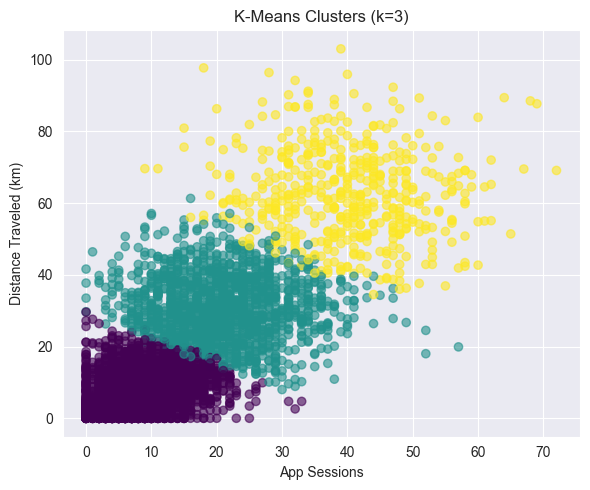

Saved cluster scatter plot as 'clusters_scatter.png'


In [21]:
#K-Means Clustering and Visualization
# Perform K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_clust)  # cluster labels for each user

# Add cluster labels to the dataframe for analysis
df['Cluster'] = clusters

# Print cluster size counts
print("\nCluster membership counts:")
print(pd.Series(clusters).value_counts().sort_index())

# Visualize clusters on a scatter plot (using two of the features for 2D plot)
plt.figure(figsize=(6,5))
plt.scatter(df['AppSessions'], df['Distance'], c=clusters, cmap='viridis', alpha=0.6)
plt.title(f"K-Means Clusters (k={optimal_k})")
plt.xlabel("App Sessions")
plt.ylabel("Distance Traveled (km)")
plt.tight_layout()
plt.savefig("clusters_scatter.png")
plt.show()
print("Saved cluster scatter plot as 'clusters_scatter.png'")
#Comments: We run KMeans with the chosen optimal_k and assign each user to a cluster. We then examine the cluster sizes (counts of users in each cluster). To visualize the clustering result, we plot users in a two-dimensional space of AppSessions vs Distance (color-coded by cluster label). In the scatter:
#We expect distinct groupings, for example:
#A cluster of low-session, low-distance users (likely the sedentary/light users),
#A cluster of moderate sessions and distance,
#A cluster of high sessions, high distance (the most active users).
#The cluster centroids (not plotted here) would represent the average profile of each cluster. The scatter plot (clusters_scatter.png) gives a sense of how well-separated the clusters are in the chosen dimensions. (Note: We used AppSessions vs Distance for visualization. One could also try Distance vs Calories or Sessions vs Calories – since Distance and Calories are highly correlated, the separation would look similar in those projections.)


In [22]:
#Machine Learning Model for Retention Prediction
#Purpose: Build a machine learning model to predict whether a user will be retained or churned, using all available user features. We use a Random Forest classifier for this task, evaluate its performance, and examine which features are most important for predicting retention.
#Train-Test Split and Model Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare features X and target y for retention prediction
X = df.drop(columns=['Retained', 'Cluster', 'CaloriesBurned'])  # use all features except the target and any clustering/target-related columns
# Note: We exclude CaloriesBurned here to simulate using only independent features for prediction.
# (In practice, one might exclude outcome-related features; including Calories could overly simplify retention prediction.)

y = df['Retained']

# One-hot encode categorical features in X (Gender, Location, ActivityLevel)
X = pd.get_dummies(X, columns=['Gender', 'Location', 'ActivityLevel'], drop_first=True)

# Ensure no missing values remain in X (we handled Age missing earlier, but double-check)
X = X.fillna(X.median(numeric_only=True))

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")
print("Random Forest model trained.")



Training set size: 4000, Test set size: 1000
Random Forest model trained.


In [23]:
#Model Performance Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Predict retention on the test set
y_pred = rf_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # by default, pos_label=1 (retained)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nModel Performance on Test Set:")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")

# Display confusion matrix with labels
cm_df = pd.DataFrame(cm, index=['Actual Churned','Actual Retained'],
                     columns=['Predicted Churned','Predicted Retained'])
print("\nConfusion Matrix:")
print(cm_df)



Model Performance on Test Set:
Accuracy:  0.678
Precision: 0.739
Recall:    0.842

Confusion Matrix:
                 Predicted Churned  Predicted Retained
Actual Churned                  83                 210
Actual Retained                112                 595



Top 5 Features influencing retention:
Distance                   0.345381
Age                        0.265652
AppSessions                0.238278
Gender_Male                0.029369
ActivityLevel_Sedentary    0.026280
dtype: float64


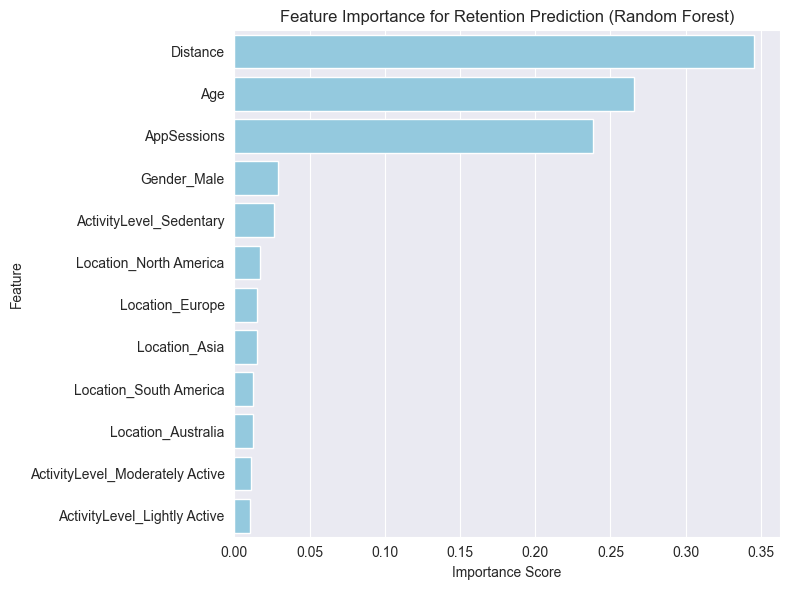

Saved feature importance plot as 'feature_importance.png'


In [24]:
#Feature Importance
## Retrieve feature importance from the random forest model
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\nTop 5 Features influencing retention:")
print(feature_importances.head(5))

# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, color='skyblue')
plt.title("Feature Importance for Retention Prediction (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()
print("Saved feature importance plot as 'feature_importance.png'")
